In [1]:
import pandas as pd
import numpy as np
import math
import random
from sklearn.cross_validation import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn import preprocessing
import xgboost as xgb
from sklearn.model_selection import KFold, GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline

/Users/linguangbo/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train = pd.read_csv('mytrain.csv')
test = pd.read_csv('mytest.csv')

In [3]:
train_y = np.array(train.avg_travel_time)
# train_x = np.array(train.ix[:,4:])
# train_x = np.array(normalize(np.array(train.ix[:,4:])))
train_x = np.concatenate((normalize(np.array(train.ix[:,4:12])),np.array(train.ix[:,12:])),axis = 1)
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y,test_size=0.1, random_state=random.randrange(0,44))

In [8]:
xgb_model = xgb.XGBRegressor(max_depth=5,min_child_weight=5,gamma=0.2)
clf = GridSearchCV(xgb_model,
                   {'subsample':[i/10.0 for i in range(3,8)],
                    'colsample_bytree':[i/10.0 for i in range(3,8)]}, verbose=1,n_jobs=4,iid=False, cv=10)
clf.fit(train_x,train_y)
print(clf.best_score_)
print(clf.best_params_)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   15.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  2.1min finished


0.123916454737
{'subsample': 0.6, 'colsample_bytree': 0.3}


In [10]:
xgb_model = xgb.XGBRegressor(max_depth=5,min_child_weight=5,gamma=0.2)
clf = GridSearchCV(xgb_model,
                   {'subsample':[i/100.0 for i in range(55,75,5)],
                    'colsample_bytree':[i/100.0 for i in range(5,40,5)]}, verbose=1,n_jobs=4,iid=False, cv=10)
clf.fit(train_x,train_y)
print(clf.best_score_)
print(clf.best_params_)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   45.8s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:  1.3min finished


0.123916454737
{'subsample': 0.6, 'colsample_bytree': 0.3}


In [11]:
xgb_model = xgb.XGBRegressor(max_depth=5,min_child_weight=5,gamma=0.2,subsample=0.6,colsample_bytree=0.3)
clf = GridSearchCV(xgb_model,
                   {'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}, verbose=1,n_jobs=4,iid=False, cv=10)
clf.fit(train_x,train_y)
print(clf.best_score_)
print(clf.best_params_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.6s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   20.1s finished


0.12391654309
{'reg_alpha': 0.01}


In [12]:
xgb_model = xgb.XGBRegressor(max_depth=5,min_child_weight=5,gamma=0.2,subsample=0.6,colsample_bytree=0.3)
clf = GridSearchCV(xgb_model,
                   {'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]}, verbose=1,n_jobs=4,iid=False, cv=10)
clf.fit(train_x,train_y)
print(clf.best_score_)
print(clf.best_params_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.3s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   19.9s finished


0.12391654309
{'reg_alpha': 0.01}


In [13]:
xgb_model = xgb.XGBRegressor(max_depth=5,min_child_weight=5,gamma=0.2,subsample=0.6,colsample_bytree=0.3,reg_alpha=0.01).fit(X_train,y_train)
predictions = xgb_model.predict(X_test)
print(metrics.mean_absolute_error(y_test, predictions))

24.9122716522


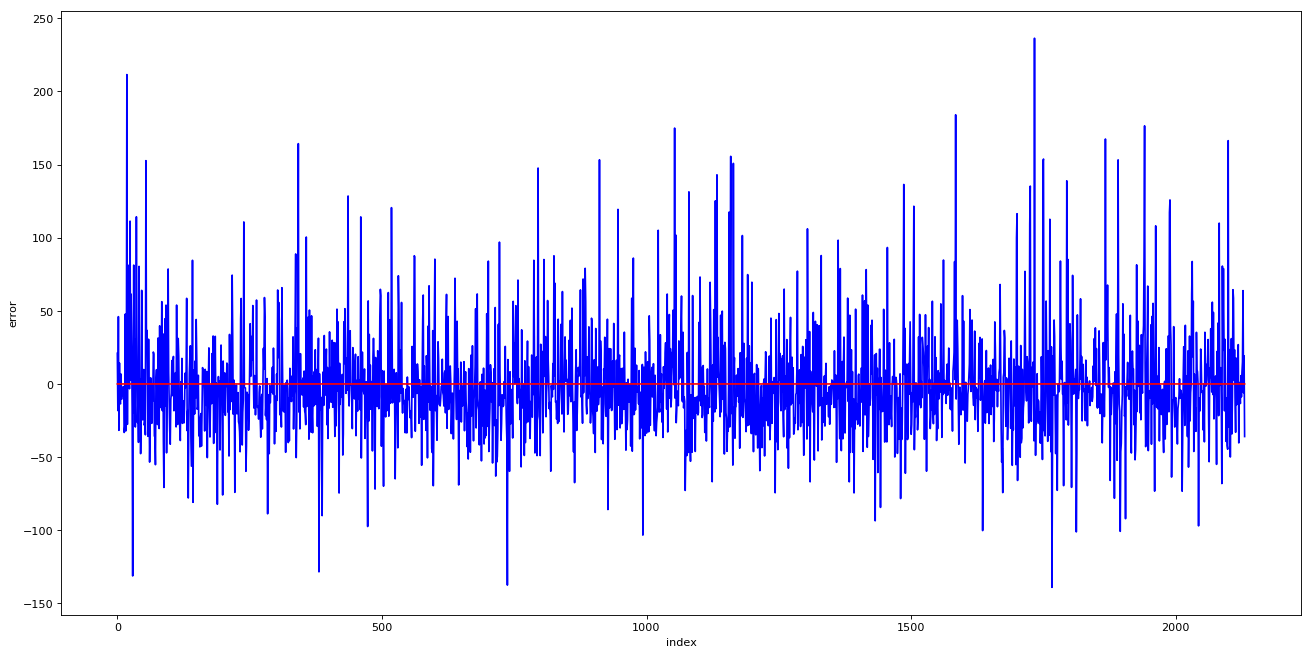

In [14]:
y_err = y_test - predictions
plt.figure(2,figsize=(20, 10), dpi=80)
plt.plot(range(len(y_err)),y_err,'b-')
plt.plot(range(len(y_err)),np.zeros(len(y_err)),'r-')
plt.xlabel('index')
plt.ylabel('error')

In [19]:
test_x = np.concatenate((normalize(np.array(test.ix[:,3:11])),np.array(test.ix[:,11:])),axis = 1)

In [20]:
pre = xgb_model.predict(test_x)

In [21]:
train

,intersection_id,tollgate_id,time_window,avg_travel_time,pressure,sea_pressure,wind_direction,wind_speed,temperature,rel_humidity,...,1,2,3,monday,Tuesday,Wednesday,Thursday,Friday,Saturday,sunday
0,B,3,"[2016-07-19 00:00:00,2016-07-19 00:20:00)",70.85,1000.9,1005.8,219,3.3,27.5,81,...,0,0,1,1,0,0,0,0,0,0
1,B,3,"[2016-07-19 00:20:00,2016-07-19 00:40:00)",148.79,1000.9,1005.8,219,3.3,27.5,81,...,0,0,1,1,0,0,0,0,0,0
2,B,3,"[2016-07-19 01:40:00,2016-07-19 02:00:00)",93.72,1000.9,1005.8,219,3.3,27.5,81,...,0,0,1,1,0,0,0,0,0,0
3,B,3,"[2016-07-19 02:00:00,2016-07-19 02:20:00)",67.81,1000.9,1005.8,219,3.3,27.5,81,...,0,0,1,1,0,0,0,0,0,0
4,B,3,"[2016-07-19 02:40:00,2016-07-19 03:00:00)",167.55,1000.9,1005.8,219,3.3,27.5,81,...,0,0,1,1,0,0,0,0,0,0
5,B,3,"[2016-07-19 03:40:00,2016-07-19 04:00:00)",98.49,1000.5,1005.3,212,3.8,31.7,65,...,0,0,1,1,0,0,0,0,0,0
6,B,3,"[2016-07-19 04:00:00,2016-07-19 04:20:00)",96.67,1000.5,1005.3,212,3.8,31.7,65,...,0,0,1,1,0,0,0,0,0,0
7,B,3,"[2016-07-19 04:20:00,2016-07-19 04:40:00)",53.15,1000.5,1005.3,212,3.8,31.7,65,...,0,0,1,1,0,0,0,0,0,0
8,B,3,"[2016-07-19 04:40:00,2016-07-19 05:00:00)",55.25,1000.5,1005.3,212,3.8,31.7,65,...,0,0,1,1,0,0,0,0,0,0
9,B,3,"[2016-07-19 05:00:00,2016-07-19 05:20:00)",209.66,1000.5,1005.3,212,3.8,31.7,65,...,0,0,1,1,0,0,0,0,0,0


In [22]:
test['avg_travel_time'] = pre.ravel()

In [24]:
test.to_csv('submi.csv')

In [25]:
test_x[0]

array([ 0.70391439,  0.70739842,  0.02578186,  0.00299627,  0.01358774,
        0.05435094,  0.        ,  0.01672337,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [26]:
from sklearn.neural_network import MLPRegressor

In [27]:
mlp = MLPRegressor()
clf = GridSearchCV(mlp,
                   {'hidden_layer_sizes':[(20),(30),(30,30)]
                    }, verbose=1,n_jobs=4,iid=False, cv=10)
clf.fit(train_x,train_y)
print(clf.best_score_)
print(clf.best_params_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   55.1s finished


0.0608704971961
{'hidden_layer_sizes': (30, 30)}


In [29]:
mlp = MLPRegressor()
clf = GridSearchCV(mlp,
                   {'hidden_layer_sizes':[(10,10),(5,5),(5,5,5),(10,10,10)]
                    }, verbose=1,n_jobs=4,iid=False, cv=10)
clf.fit(train_x,train_y)
print(clf.best_score_)
print(clf.best_params_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   30.6s finished


0.0502149231403
{'hidden_layer_sizes': (5, 5)}


In [30]:
mlp = MLPRegressor()
clf = GridSearchCV(mlp,
                   {'hidden_layer_sizes':[(2,2),(5,5),(8,8)]
                    }, verbose=1,n_jobs=4,iid=False, cv=10)
clf.fit(train_x,train_y)
print(clf.best_score_)
print(clf.best_params_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Users/linguangbo/anaconda/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/linguangbo/anaconda/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/linguangbo/anaconda/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/linguangbo/anaconda/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
[Paralle

0.0466077034771
{'hidden_layer_sizes': (8, 8)}


In [31]:
mlp = MLPRegressor()
clf = GridSearchCV(mlp,
                   {'hidden_layer_sizes':[(8,8),(9,9),(7,7),(8,8,8)]
                    }, verbose=1,n_jobs=4,iid=False, cv=10)
clf.fit(train_x,train_y)
print(clf.best_score_)
print(clf.best_params_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   34.8s finished


0.0533757103378
{'hidden_layer_sizes': (8, 8, 8)}


In [32]:
mlp = MLPRegressor()
clf = GridSearchCV(mlp,
                   {'hidden_layer_sizes':[(7,7,7),(9,9,9),(8,8,8)]
                    }, verbose=1,n_jobs=4,iid=False, cv=10)
clf.fit(train_x,train_y)
print(clf.best_score_)
print(clf.best_params_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Users/linguangbo/anaconda/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   26.2s finished


0.0468071690384
{'hidden_layer_sizes': (8, 8, 8)}


In [34]:
mlp = MLPRegressor(hidden_layer_sizes=(8,8,8))
clf = GridSearchCV(mlp,
                   {'batch_size':[400,1000,300,200]
                    }, verbose=1,n_jobs=4,iid=False, cv=10)
clf.fit(train_x,train_y)
print(clf.best_score_)
print(clf.best_params_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   29.0s finished


0.0499081799909
{'batch_size': 200}


In [36]:
mlp = MLPRegressor(hidden_layer_sizes=(8,8,8))
mlp.fit(X_train,y_train)
pre = mlp.predict(X_test)
print(metrics.mean_absolute_error(y_test, pre))

27.0549455313


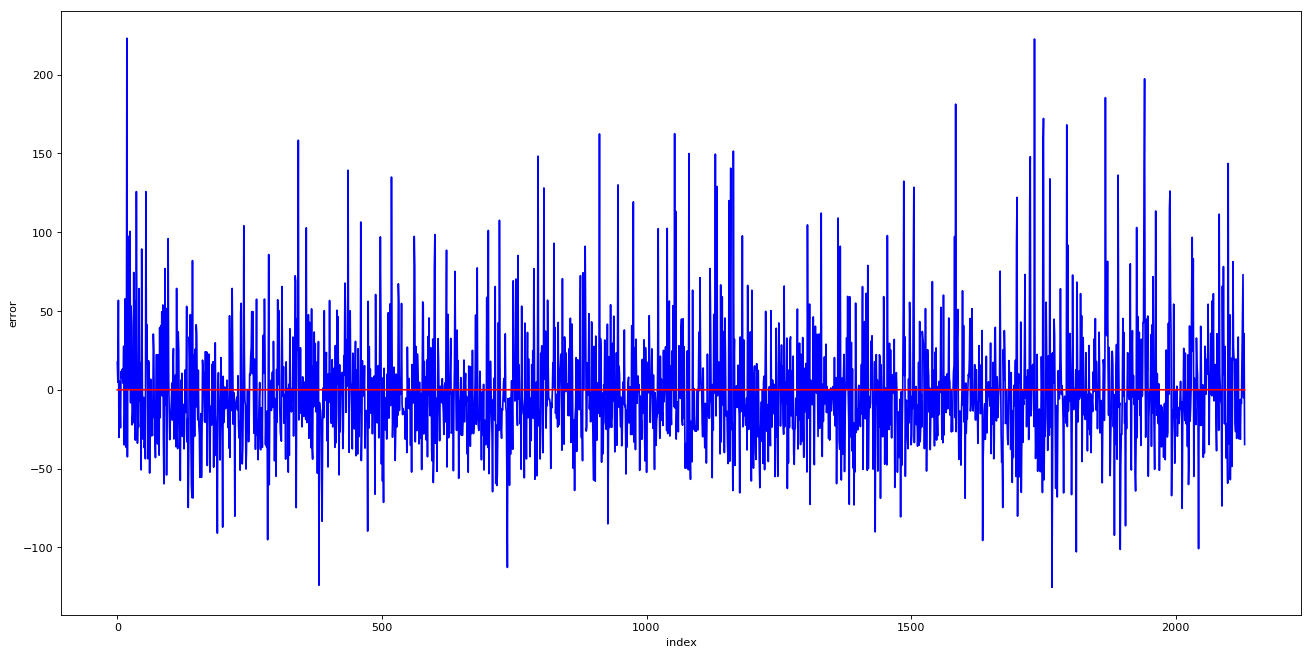

In [37]:
y_err = y_test - pre
plt.figure(2,figsize=(20, 10), dpi=80)
plt.plot(range(len(y_err)),y_err,'b-')
plt.plot(range(len(y_err)),np.zeros(len(y_err)),'r-')
plt.xlabel('index')
plt.ylabel('error')

In [40]:
pre = mlp.predict(test_x)
test['avg_travel_time2'] = pre.ravel()
test.to_csv('sub.csv',index=False)

In [39]:
pre

array([ 112.87253406,  112.89879441,  112.92504017,  112.540078  ,
        112.56627768,  112.59246287,  117.13079177,  117.15589117,
        117.18097422,  117.37006461,  117.39506588,  117.4200507 ,
        118.10284335,  118.12886638,  118.15487399,  119.73936938,
        119.76478253,  119.7901801 ,  120.37761525,  120.40260412,
        120.42757668,  116.9529063 ,  116.97860971,  117.00429741,
        114.55918197,  114.58468435,  114.61017121,  112.02112892,
        112.04724915,  112.07335421,  114.289377  ,  114.3148124 ,
        114.34023136,  115.56126275,  115.5862279 ,  115.6111765 ,
        116.30176366,  116.32785945,  116.35394098,  116.20805193,
        116.23405774,  116.26004932,  120.98042267,  121.00522137,
        121.03000407,  121.13548351,  121.16021335,  121.18492709,
        118.70323288,  118.72915511,  118.75506328,  118.46287783,
        118.48875022,  118.51460861,  123.0680401 ,  123.09278133,
        123.1175068 ,  123.29725082,  123.32191031,  123.34655